In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [23]:
lfw_people = fetch_lfw_people()
print(lfw_people)

{'data': array([[ 34.      ,  29.333334,  22.333334, ...,  14.666667,  16.      ,
         14.      ],
       [158.      , 160.66667 , 169.66667 , ..., 138.66667 , 135.33333 ,
        130.33333 ],
       [ 77.      ,  81.333336,  88.      , ..., 192.      , 145.33333 ,
         66.333336],
       ...,
       [ 38.      ,  41.666668,  55.333332, ...,  66.      ,  63.666668,
         54.333332],
       [ 16.666666,  24.333334,  60.333332, ..., 219.      , 143.33333 ,
         69.333336],
       [ 58.333332,  48.      ,  20.      , ..., 116.      , 106.333336,
        143.33333 ]], dtype=float32), 'images': array([[[ 34.      ,  29.333334,  22.333334, ...,  20.      ,
          25.666666,  30.666666],
        [ 37.333332,  32.      ,  25.333334, ...,  21.      ,
          26.666666,  32.      ],
        [ 33.333332,  32.333332,  40.333332, ...,  23.666666,
          28.      ,  35.666668],
        ...,
        [166.      ,  97.      ,  44.333332, ...,   9.666667,
          14.333333,  12.

In [24]:
X = lfw_people.data
y = lfw_people.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9924, 2914) (9924,) (3309, 2914) (3309,)


In [25]:
target_names = lfw_people.target_names
w = 47
h = 62

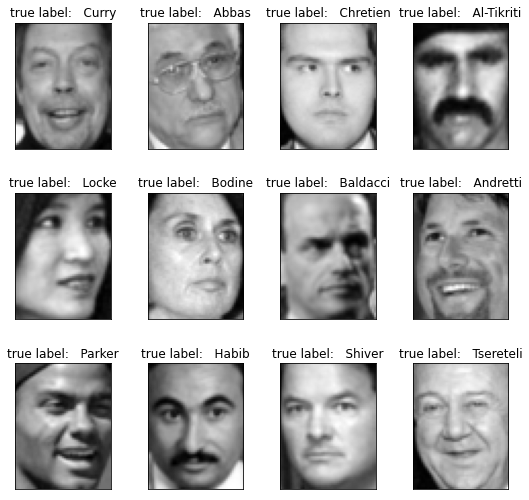

In [26]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
 
# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)
 
true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [27]:
pca = PCA(n_components=32)
pca.fit(X_train)
t_X_train = pca.transform(X_train)
t_X_train.shape

(9924, 32)

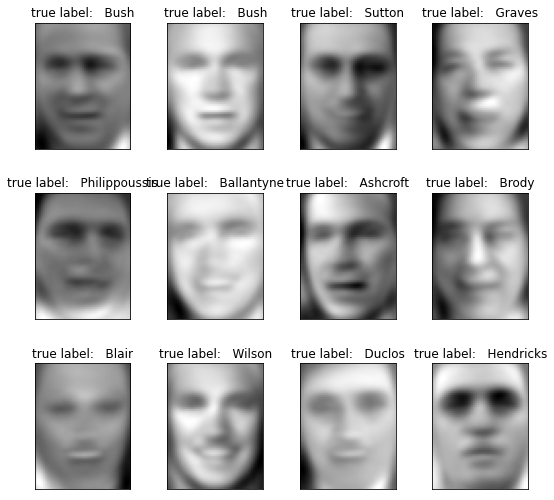

In [28]:
re_X_train = pca.inverse_transform(t_X_train)
true_titles = [true_title(y_train, target_names, i)
                     for i in range(y_train.shape[0])]
plot_gallery(re_X_train, true_titles, h, w)

In [29]:
model = LogisticRegression()
model.fit(t_X_train, y_train)

KeyboardInterrupt: ignored